## Load connectivity matrix and sort columns/rows

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [3]:
n = 20  # rows
m = 10  # columns

# generate circulant matrix 
thi = np.linspace(-np.pi,np.pi,n+1)[0:-1]
thj = np.linspace(-np.pi,np.pi,m+1)[0:-1]
M = np.exp(np.cos(np.subtract.outer(thi, thj)))

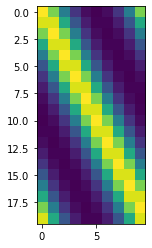

In [4]:
plt.imshow(M)

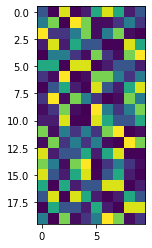

In [5]:
# Shuffle matrix
Ms = M.copy()
np.random.shuffle(Ms)
np.random.shuffle(Ms.T)
np.random.shuffle(Ms.T)
plt.imshow(Ms)

In [6]:
# Find the ordering
U, s, Vh = linalg.svd(Ms - Ms.mean(),lapack_driver='gesvd')

rec_thi = cart2pol(U[:,0],U[:,1])[1]
rec_thj = cart2pol(Vh[0],Vh[1])[1]

idx_i = np.argsort(rec_thi)
idx_j = np.argsort(rec_thj)

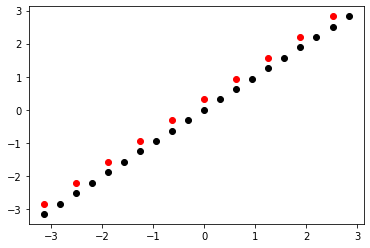

In [7]:
plt.plot(thi, rec_thi[idx_i],'ok')
plt.plot(thj, rec_thj[idx_j],'or')

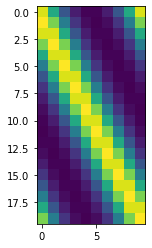

In [8]:
Mo = Ms[idx_i,:]
Mo = Mo[:,idx_j]

plt.imshow(Mo)

### Import real data

In [9]:
import pandas as pd

conmatFile = "adjacencyMatrix_TB2RN_byid.csv"
edgeFile = "edgeList_TB2RN_byid.csv"

contab_df=pd.read_csv(conmatFile, sep=',')
edges_df=pd.read_csv(edgeFile, sep=',')

contab_df.head()

,1046726261,1047426385,1077459090,1077459077,1169898618,1140240894,5813013678,1170857299,1171910380,1046735096,...,1261773414,1355810793,5813020455,1261423534,1262114112,1261773286,1262101350,1324430237,1261760414,5812983734
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Sort adjacency matrix

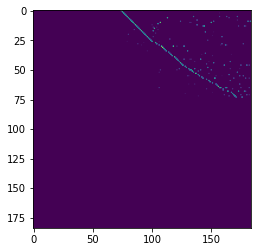

In [10]:
M = contab_df.to_numpy()
plt.imshow(M)

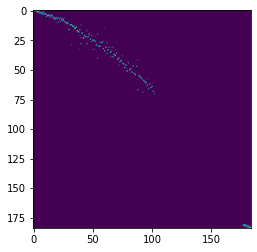

In [11]:
U, s, Vh = linalg.svd(M - M.mean(),lapack_driver='gesvd')

rec_thi = cart2pol(U[:,0],U[:,1])[1]
rec_thj = cart2pol(Vh[0],Vh[1])[1]

idx_i = np.argsort(rec_thi)
idx_j = np.argsort(rec_thj)

Mo = M[idx_i,:]
Mo = Mo[:,idx_j]

plt.imshow(Mo)

In [12]:
colnames = contab_df.columns
ycols = list(colnames[idx_i])
xcols = list(colnames[idx_j])

In [13]:
import csv

with open('ycol_bodyids.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(xcols)
    
with open('xcol_bodyids.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(ycols)
